<a href="https://colab.research.google.com/github/ShineySun/2019-Lane-Detect/blob/master/trace_direction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python 버전 확인 및 OpenCV설치

In [0]:
!python --version

Python 3.6.8


In [0]:
!pip install opencv-python==3.4.2.16 && pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 25.0MB 25.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.7.28
    Uninstalling opencv-python-3.4.7.28:
      Successfully uninstalled opencv-python-3.4.7.28
     |████████████████████████████████| 30.6MB 1.5MB/s 
  Found existing installation: opencv-contrib-python 3.4.3.18
    Uninstalling opencv-contrib-python-3.4.3.18:
      Successfully uninstalled opencv-contrib-python-3.4.3.18


# OpenCV 버전 확인

In [0]:
import cv2
cv2.__version__

'3.4.2'

# 실습 이미지 다운로드

## 이미지 다운로드

In [0]:
!wget https://i.imgur.com/iWGMlJR.png
!mv iWGMlJR.png sample.png

--2019-10-10 16:17:15--  https://i.imgur.com/iWGMlJR.png
Resolving i.imgur.com (i.imgur.com)... 151.101.184.193
Connecting to i.imgur.com (i.imgur.com)|151.101.184.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 491 [image/png]
Saving to: ‘iWGMlJR.png’

iWGMlJR.png         100%[===================>]     491  --.-KB/s    in 0s      

2019-10-10 16:17:16 (74.0 MB/s) - ‘iWGMlJR.png’ saved [491/491]



# 4연결성과 8연결성 라벨링 출력 예시
## 숫자로 표시
![alt text](https://i.imgur.com/lQ9nXox.png)
## 색상으로 표시
![alt text](https://i.imgur.com/91M3MwP.png)

# 과제1: 4연결성 라벨링

## 위의 4연결성(4-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
## cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [0]:
cnt_four = 0
cnt_eight = 0
four_direction = np.array([[0,1],[1,0],[0,-1],[-1,0]])
eight_direction = np.array([[0,1],[1,1],[1,0],[1,-1],[0,-1],[-1,-1],[-1,0],[-1,1]])


print(four_direction)
print(eight_direction)

[[ 0  1]
 [ 1  0]
 [ 0 -1]
 [-1  0]]
[[ 0  1]
 [ 1  1]
 [ 1  0]
 [ 1 -1]
 [ 0 -1]
 [-1 -1]
 [-1  0]
 [-1  1]]


In [0]:
# img , x 좌표, y좌표, key값, mode(4 or 8)
def dfs(img,x,y,key,mode):
  global four_direction
  global eight_direction
    
  img[y][x] = key
  
  if mode == 4 :
    for i in range(0,mode):
      new_x = x + four_direction[i][0]
      new_y = y + four_direction[i][1]
      
      if img[new_y][new_x] == 255:
        img = dfs(img, new_x, new_y, key, mode)
  elif mode == 8:
    for i in range(0,mode):
      new_x = x + eight_direction[i][0]
      new_y = y + eight_direction[i][1]
      
      if img[new_y][new_x] == 255:
        img = dfs(img, new_x, new_y, key, mode)
    
        
  return img      
    
  
  

In [0]:
def four_connect(img):
    global cnt_four
    
    # Get Height, Width 
    height,width,channel = img.shape
    
    # BGR TO GRAYSCALE
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    for y in range(0,height):
      for x in range(0,width):
        if gray_img[y][x] == 255:
          cnt_four += 3
          gray_img = dfs(gray_img,x,y,cnt_four,4)
 
    return gray_img

label_count :  81.0


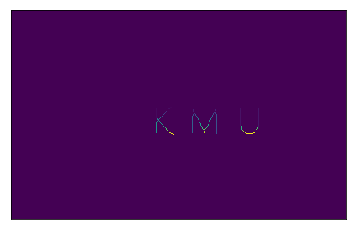

In [0]:
img = cv2.imread('sample.png')

labeled_img = four_connect(img)

height, width = labeled_img.shape

# for y in range(0,height):
#   for x in range(0,width):
#     print(labeled_img[y][x], end= ' ')
#   print('')

print("label_count : ", cnt_four/3)

# image 출력
plt.imshow(labeled_img,cmap = 'gray')
plt.imshow(labeled_img)
plt.grid(None)   
plt.xticks([])
plt.yticks([])
plt.show()

# 과제2: 8연결성 라벨링
## 위의 8연결성(8-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
## cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.


In [0]:
def eight_connect(img):
    # 함수 작성
    global cnt_eight
    
    # Get Height, Width 
    height,width,channel = img.shape
    
    # BGR TO GRAYSCALE
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    for y in range(0,height):
      for x in range(0,width):
        if gray_img[y][x] == 255:
          cnt_eight += 20
          gray_img = dfs(gray_img,x,y,cnt_eight,8)
    
    return gray_img

label count :  3.0


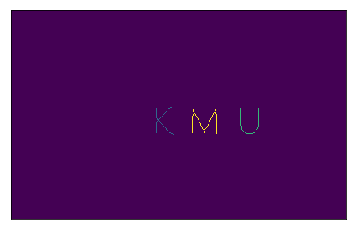

In [0]:
img = cv2.imread('sample.png')

labeled_img = eight_connect(img)

print("label count : ", cnt_eight/20)
# image 출력
plt.imshow(labeled_img,cmap = 'gray')
plt.imshow(labeled_img)
plt.grid(None)   
plt.xticks([])
plt.yticks([])
plt.show()